# Imporating the libraris

In [1]:
#for data manipulation
import numpy as np
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for model training and model evaluation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# for data preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#for Linear regression assumption
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from scipy import stats

#miscellaneous
import warnings
warnings.filterwarnings('ignore')

# Importing the Data

In [2]:
df=pd.read_csv('diamond.csv',index_col='Unnamed: 0')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(53943, 10)

In [5]:




df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53943 entries, 1 to 53943
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [7]:
#Give you all the statistical information
df.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
#Finding the missing values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
# there are no null values in any columns

In [10]:
df_num=df.select_dtypes(include='number')
df_cat=df.select_dtypes(include='object')

In [11]:
df_num.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [12]:
df_cat.columns

Index(['cut', 'color', 'clarity'], dtype='object')

# EDA

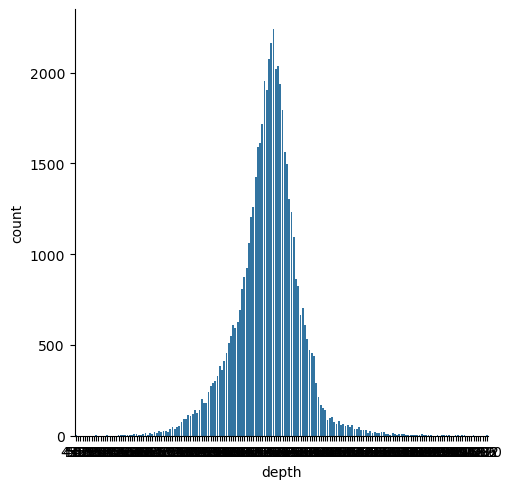

In [13]:
sns.catplot(df,x='depth',kind='count')

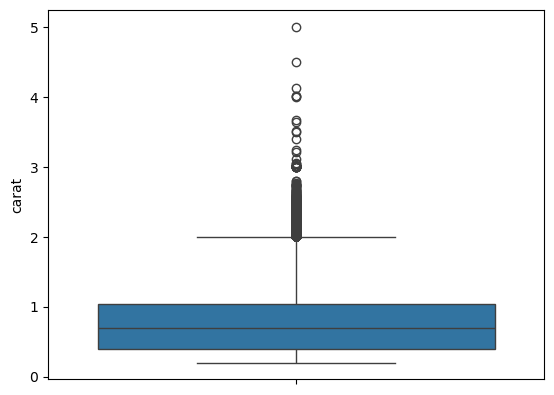

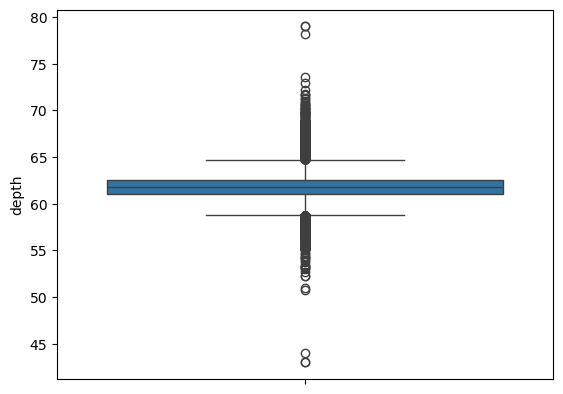

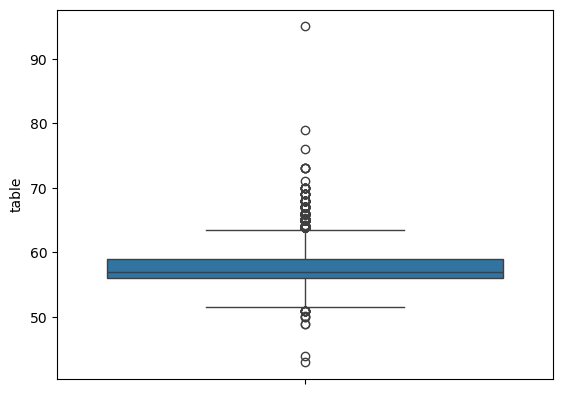

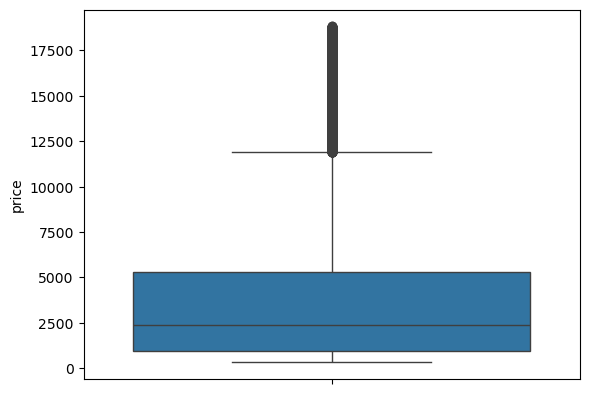

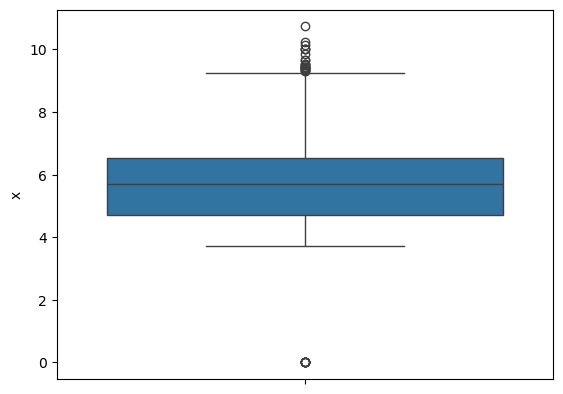

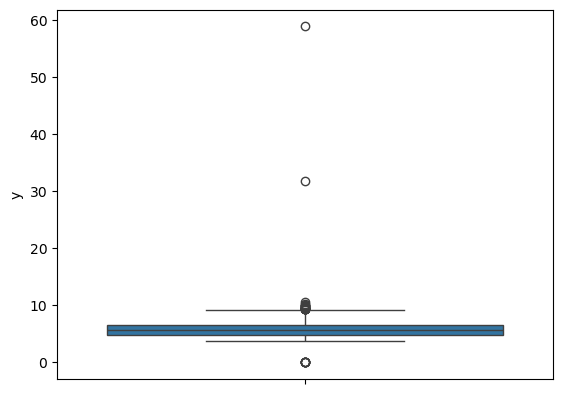

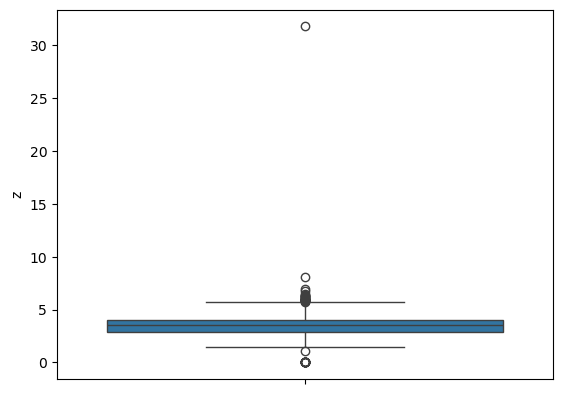

In [14]:
for i in df_num.columns:
    plt.figure()
    sns.boxplot(df[i])

carat       Axes(0.125,0.653529;0.227941x0.226471)
depth    Axes(0.398529,0.653529;0.227941x0.226471)
table    Axes(0.672059,0.653529;0.227941x0.226471)
price       Axes(0.125,0.381765;0.227941x0.226471)
x        Axes(0.398529,0.381765;0.227941x0.226471)
y        Axes(0.672059,0.381765;0.227941x0.226471)
z               Axes(0.125,0.11;0.227941x0.226471)
dtype: object

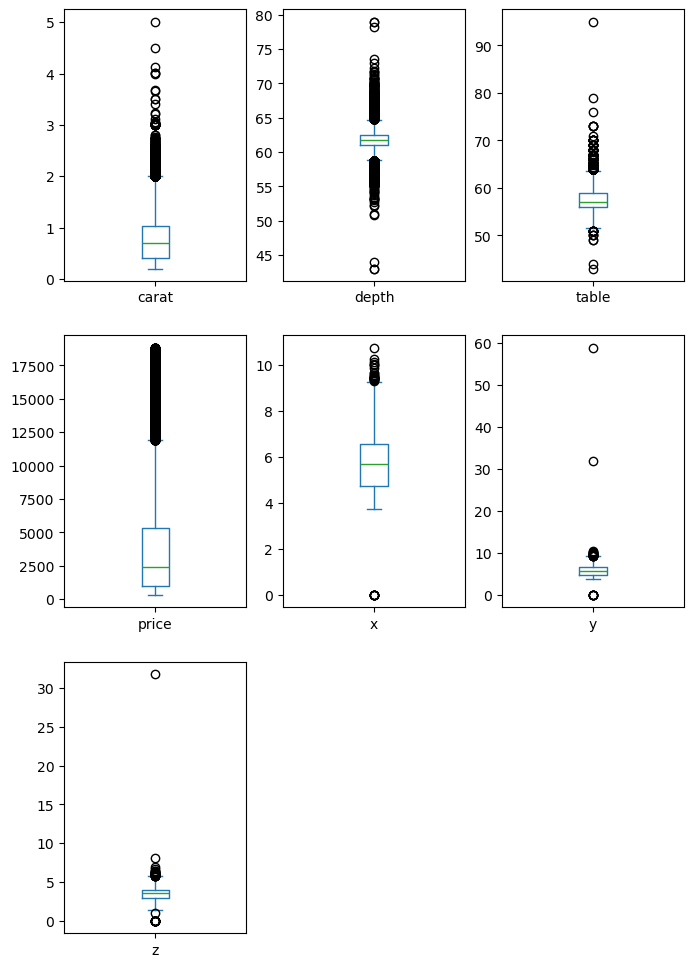

In [15]:
df_num.plot(kind='box',subplots=True,layout=(3,3),figsize=(8,12))

In [16]:







df_num.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [17]:
lst=['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [18]:
#remove outlier
for i in lst:
    Q1=np.quantile(df[i],0.25)
    Q3=np.quantile(df[i],0.75)
    IQR=Q3-Q1
    UB=Q3+1.5*IQR
    LB=Q1-1.5*IQR
    # print(i,UB,LB)
    index=df[df[i]>UB].index
    index2=df[df[i]<LB].index
    # print(index,index2)
    if len(index)!=0:
        df.drop(index,axis=0,inplace=True)
    if len(index2)!=0:
        df.drop(index2,axis=0,inplace=True)

carat       Axes(0.125,0.747241;0.227941x0.132759)
depth    Axes(0.398529,0.747241;0.227941x0.132759)
table    Axes(0.672059,0.747241;0.227941x0.132759)
price       Axes(0.125,0.587931;0.227941x0.132759)
x        Axes(0.398529,0.587931;0.227941x0.132759)
y        Axes(0.672059,0.587931;0.227941x0.132759)
z           Axes(0.125,0.428621;0.227941x0.132759)
dtype: object

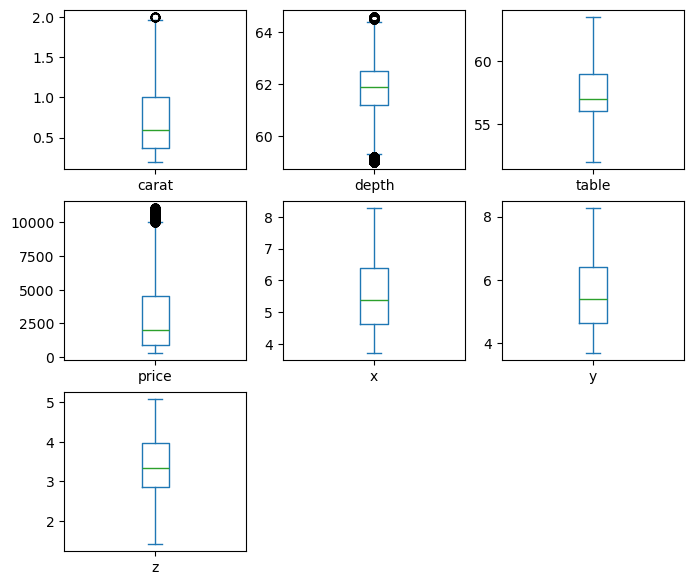

In [19]:
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(8,12))

In [20]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [21]:
df.shape

(46535, 10)

In [22]:
#Label encoding for categorical columns
df_cat.columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [23]:
df_num.columns


Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [24]:
from sklearn.preprocessing import LabelEncoder
for i in df_cat.columns:
    print(i,df[i].unique())
    print('**************************************************************')

cut ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
**************************************************************
color ['E' 'I' 'J' 'H' 'F' 'G' 'D']
**************************************************************
clarity ['SI2' 'SI1' 'VS2' 'VVS2' 'VVS1' 'VS1' 'I1' 'IF']
**************************************************************


In [25]:
for i in df_cat.columns:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])

In [26]:
for i in df_cat.columns:
    print(i,df[i].unique())
    print('***************************************************')

cut [2 3 1 4 0]
***************************************************
color [1 5 6 4 2 3 0]
***************************************************
clarity [3 2 5 7 6 4 0 1]
***************************************************


<Axes: >

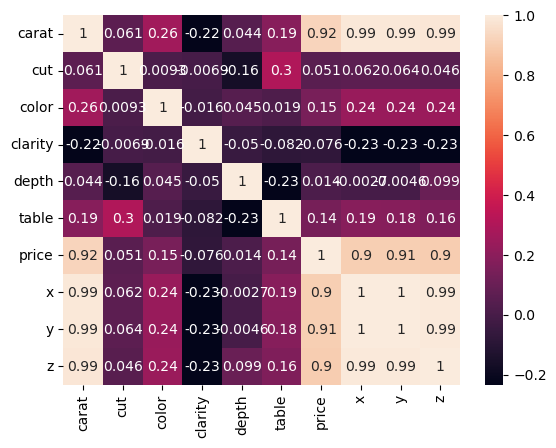

In [27]:
#Heatmap
sns.heatmap(df.corr(),annot=True)

<Figure size 640x480 with 0 Axes>

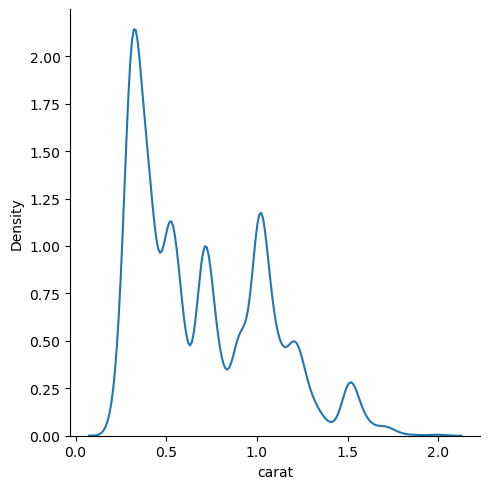

<Figure size 640x480 with 0 Axes>

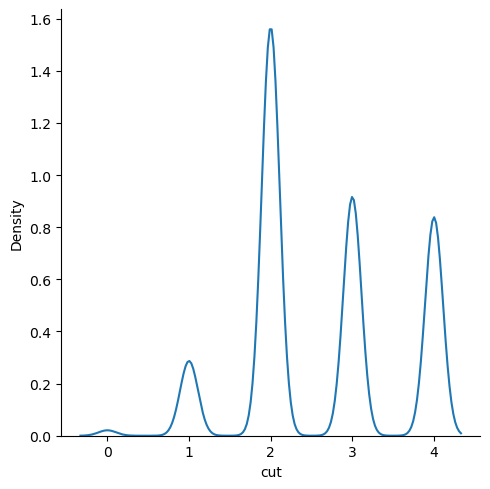

<Figure size 640x480 with 0 Axes>

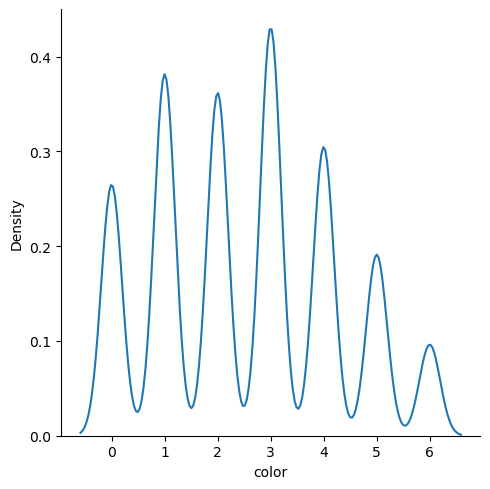

<Figure size 640x480 with 0 Axes>

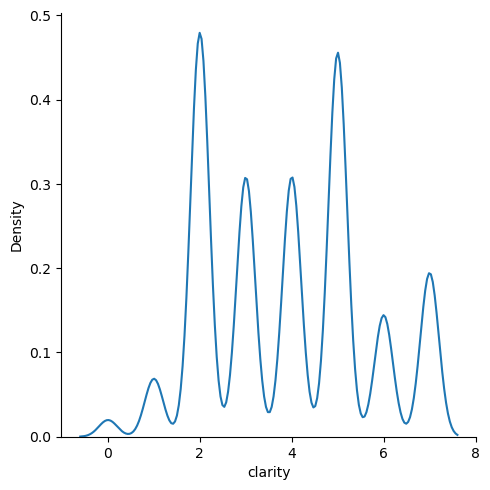

<Figure size 640x480 with 0 Axes>

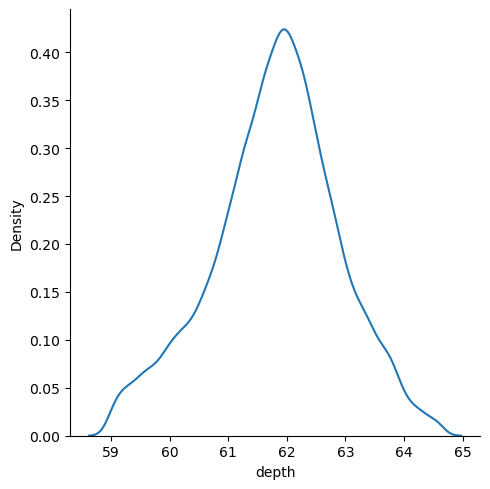

<Figure size 640x480 with 0 Axes>

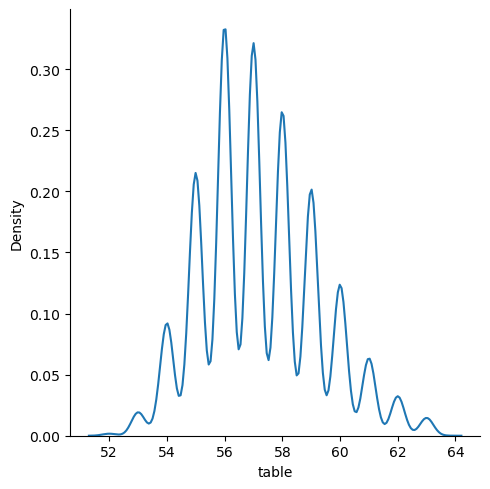

<Figure size 640x480 with 0 Axes>

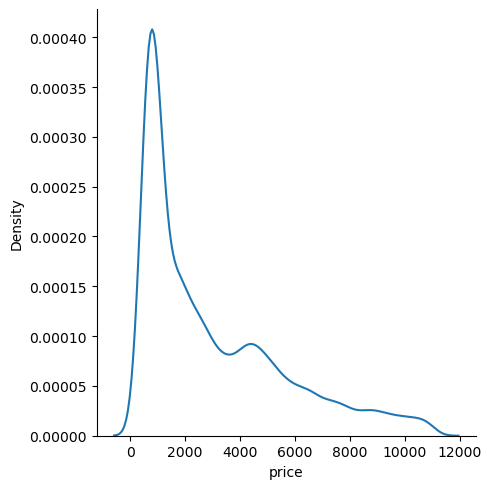

<Figure size 640x480 with 0 Axes>

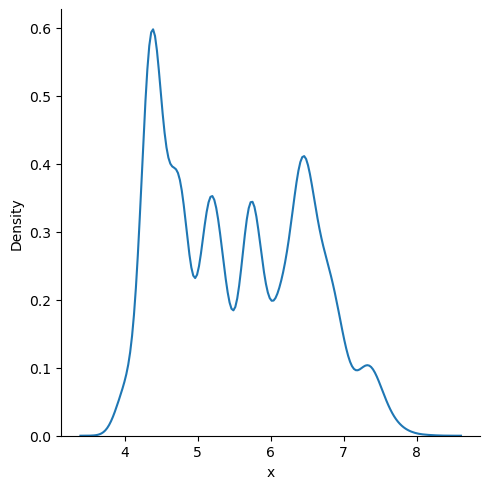

<Figure size 640x480 with 0 Axes>

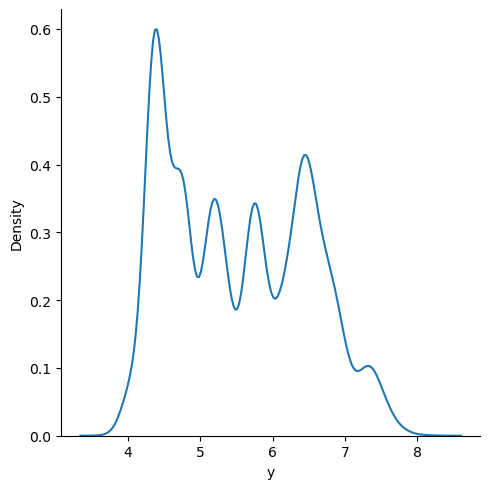

<Figure size 640x480 with 0 Axes>

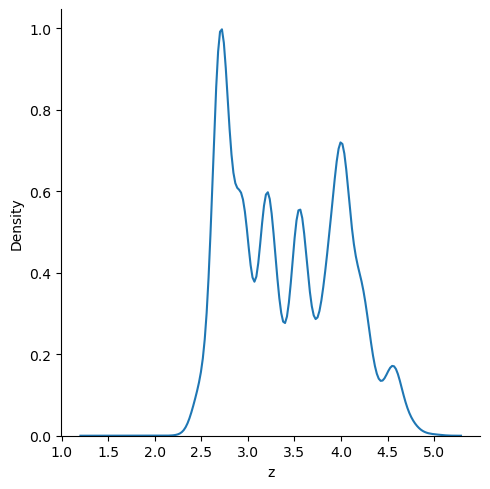

In [28]:
for i in df.columns:
    plt.figure()
    sns.displot(data=df,x=i,kind='kde')
    plt.show()

In [29]:
df.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43


In [30]:
# Splitting the data into dependent and independet variable
x=df.drop('price',axis=1)
y=df['price']
x.head()

,carat,cut,color,clarity,depth,table,x,y,z
1,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
2,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
4,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
5,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
6,0.24,4,6,7,62.8,57.0,3.94,3.96,2.48


In [31]:
y.head()

1    326
2    326
4    334
5    335
6    336
Name: price, dtype: int64

In [32]:
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
6,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48


# Model Building

In [33]:
## train_test_splite

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [35]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(37228, 9) (9307, 9) (37228,) (9307,)


In [37]:
y_pred_tr=lr.predict(x_train)
y_pred_tst=lr.predict(x_test)

In [38]:
## Testing and Training Accuracy

In [39]:
from sklearn.metrics import r2_score
print('r2_score:',r2_score(y_train,y_pred_tr))
print('r2_score:',r2_score(y_test,y_pred_tst))

r2_score: 0.8914876356435751
r2_score: 0.8895293596407764


# Prediction on scaled data

In [40]:
## Prediction on scaled data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_s=ss.fit_transform(x_train)
x_test_s=ss.transform(x_test)

In [41]:
## fitting the model on scaled data
lr.fit(x_train_s,y_train)

LinearRegression()

In [42]:
# predicting values fro x_train and x_test
y_pred_tr_scal=lr.predict(x_train_s)
y_pred_tst_scal=lr.predict(x_test_s)

In [43]:
## Testing and Training Accuracy on scaled data
from sklearn.metrics import r2_score
scal_r2_training=r2_score(y_train,y_pred_tr_scal)*100
scal_r2_testing=r2_score(y_test,y_pred_tst_scal)*100

In [44]:
print('Accuracy score on Training Data (Linear Regression):',scal_r2_training)
print('Accuracy score on Testing Data (Linear Regression):',scal_r2_testing)

Accuracy score on Training Data (Linear Regression): 89.14876356435751
Accuracy score on Testing Data (Linear Regression): 88.95293596407765


In [45]:
# VIF
# 

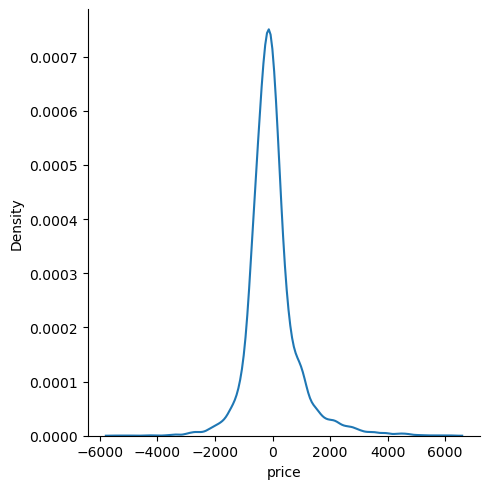

In [46]:
## normality of residues
sns.displot(y_test-y_pred_tst,kind='kde')

# Polynomial Regression

In [47]:
from sklearn.preprocessing import PolynomialFeatures
Pol_r=PolynomialFeatures(degree=2)
x_train_pol=Pol_r.fit_transform(x_train)
x_test_pol=Pol_r.fit_transform(x_test)

In [48]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_pol,y_train)

LinearRegression()

In [49]:
# predicting values fro x_train_pol and x_test_pol
y_pred_tr_pol=lr.predict(x_train_pol)
y_pred_tst_pol=lr.predict(x_test_pol)

In [50]:
## Testing and Training Accuracy on Polynomial Regression
from sklearn.metrics import r2_score
pol_r2_training=r2_score(y_train,y_pred_tr_pol)*100
pol_r2_testing=r2_score(y_test,y_pred_tst_pol)*100

In [51]:
print('Accuracy score on Training Data (Polynomial Regression):',pol_r2_training)
print('Accuracy score on Testing Data (Polynomial Regression):',pol_r2_testing)

Accuracy score on Training Data (Polynomial Regression): 93.40930044685336
Accuracy score on Testing Data (Polynomial Regression): 93.04613024195679


# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor(max_depth=20,min_samples_split=5,min_samples_leaf=4)
DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=5)

In [53]:
y_pred_tr_dectree=DT.predict(x_train)
y_pred_tst_dectree=DT.predict(x_test)

In [54]:
## Testing and Training Accuracy on Decision Tree
from sklearn.metrics import r2_score
dectree_r2_training=r2_score(y_train,y_pred_tr_dectree)*100
dectree_r2_testing=r2_score(y_test,y_pred_tst_dectree)*100

In [55]:
print('Accuracy score on Training Data (Decision Tree):',dectree_r2_training)
print('Accuracy score on Testing Data (Decision Tree):',dectree_r2_testing)

Accuracy score on Training Data (Decision Tree): 99.21108353575472
Accuracy score on Testing Data (Decision Tree): 97.35128457325219


In [56]:
DT.get_depth()

20

In [57]:
from sklearn import metrics
print('MSE:',metrics.mean_squared_error(y_test,y_pred_tst))
print('RMSE:',metrics.mean_squared_error(y_test,y_pred_tst))
print('MAE is: ',metrics.mean_absolute_error(y_test,y_pred_tst))
print('MAPE is: ',metrics.mean_absolute_percentage_error(y_test,y_pred_tst))

MSE: 746484.2122622773
RMSE: 746484.2122622773
MAE is:  574.6201507739145
MAPE is:  0.28642382026331725


In [58]:
## Random Forest
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=109)
RF.fit(x_train,y_train)

RandomForestRegressor(n_estimators=109)

In [59]:
# predicting values fro x_train and x_test
y_pred_tr_rand=RF.predict(x_train)
y_pred_tst_rand=RF.predict(x_test)

In [60]:
## Testing and Training Accuracy on Random Forest
rand_r2_training=r2_score(y_train,y_pred_tr_rand)*100
rand_r2_testing=r2_score(y_test,y_pred_tst_rand)*100
print('Training Accuracy (Random Forest):',rand_r2_training)
print('Testing Accuracy (Random Forest):',rand_r2_testing)

Training Accuracy (Random Forest): 99.75176666437319
Testing Accuracy (Random Forest): 98.15591985466428


In [61]:
# Hyperparameter tuning for random forest

In [62]:
#param={'n_estimators':[60,65,70,80,90,100],\
#      'max_depth':[4,5,6,7],\
#    'min_samples_leaf':[1,2,3,4],\
#    'max_features':['sqrt','log','auto']
#     }

In [63]:
#from sklearn.model_selection import GridSearchCV
#cv=GridSearchCV(RF,param_grid=param,cv=5,scoring='accuracy')

In [64]:
#cv.fit(x_train,y_train)

# Bagging

In [65]:
from sklearn.ensemble import BaggingRegressor
BG=BaggingRegressor() 
BG.fit(x_train,y_train)

BaggingRegressor()

In [73]:
y_pred_tr_bagg=BG.predict(x_train)
y_pred_test_bagg=BG.predict(x_test)

In [67]:
bagg_r2_training=r2_score(y_train,y_pred_tr_bagg)*100
bagg_r2_testing=r2_score(y_test,y_pred_test_bagg)*100
print('r2 score on Training data (Bagging):',bagg_r2_training)
print('r2 score on Testing data (Bagging):',bagg_r2_testing)

r2 score on Training data (Bagging): 99.65484535472568
r2 score on Testing data (Bagging): 98.0309748836358


In [68]:
from sklearn import metrics
print('MSE:',metrics.mean_squared_error(y_test,y_pred_tst))
print('RMSE is: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred_tst)))
print('MAE is: ',metrics.mean_absolute_error(y_test,y_pred_tst))
print('MAPE is: ',metrics.mean_absolute_percentage_error(y_test,y_pred_tst))

MSE: 746484.2122622773
RMSE is:  863.9931783655918
MAE is:  574.6201507739145
MAPE is:  0.28642382026331725


# GradientBoosting

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

In [70]:
GB=GradientBoostingRegressor()   
GB.fit(x_train,y_train)

GradientBoostingRegressor()

In [71]:
y_pred_grad_tr=GB.predict(x_train)
y_pred_grad_test=GB.predict(x_test)

In [72]:
# Accuracy on Training and Testing data
grad_r2_training=r2_score(y_train,y_pred_grad_tr)*100
grad_r2_testing=r2_score(y_test,y_pred_grad_test)*100
print('r2 score on Training data (GradientBoost):',grad_r2_training)
print('r2 score on Testing data (GradientBoost):',grad_r2_testing)

r2 score on Training data (GradientBoost): 97.58703767243281
r2 score on Testing data (GradientBoost): 97.32851159994365
